In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

dogs-vs-cats.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
import zipfile
ref = zipfile.ZipFile('/content/dogs-vs-cats.zip')
ref.extractall('/content')
ref.close()

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, BatchNormalization, Dropout

In [ ]:
# Generators

train_ds = keras.utils.image_dataset_from_directory(directory = '/content/train',
                                                    labels = 'inferred',
                                                    label_mode='int',
                                                    batch_size=32,
                                                    image_size=(256, 256))

test_ds = keras.utils.image_dataset_from_directory(directory = '/content/test',
                                                    labels = 'inferred',
                                                    label_mode='int',
                                                    batch_size=32,
                                                    image_size=(256, 256))

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [ ]:
# Normalization

def process(image, label):
  image = tf.cast(image/255.0, tf.float32)
  return image, label

In [ ]:
train_ds = train_ds.map(process)
test_ds = test_ds.map(process)

#  CNN - Model Building
##### AlexNet
##### VGG16

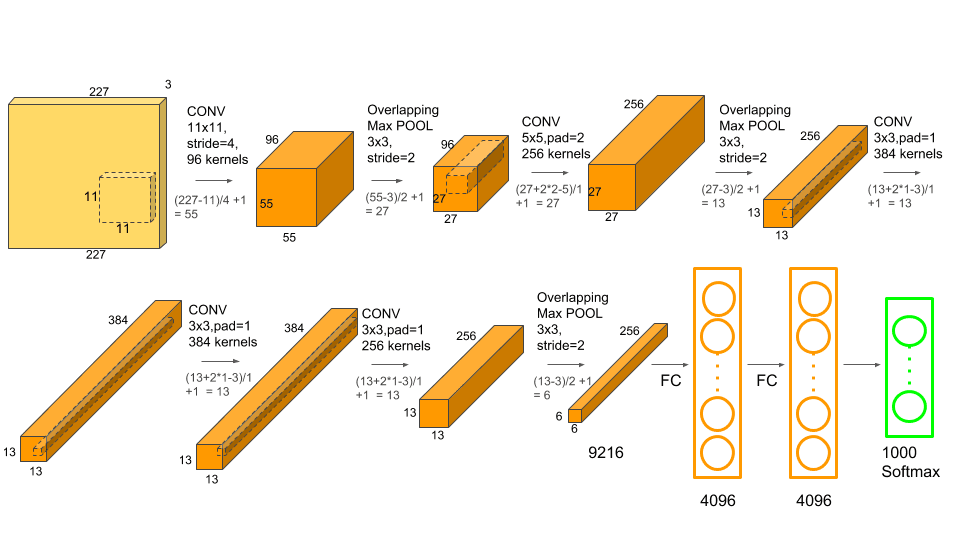

In [ ]:
model = Sequential()

# Conv1
model.add(Conv2D(96, kernel_size= (11,11), strides= (4,4), padding = 'valid',activation='relu', input_shape = (256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(3,3), strides = 2, padding='valid'))

# Conv2
model.add(Conv2D(256, kernel_size= (5,5), strides=(1,1), padding='same', activation= 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(3,3), strides = 2, padding='valid'))

# Conv3
model.add(Conv2D(384, kernel_size= (3,3), strides=(1,1), padding='same', activation= 'relu'))
model.add(BatchNormalization())

# Conv4
model.add(Conv2D(384, kernel_size= (3,3), strides=(1,1), padding='valid', activation= 'relu'))
model.add(BatchNormalization())


# Conv5
model.add(Conv2D(256, kernel_size= (3,3), strides=(1,1), padding='valid', activation= 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(3,3), strides = 2, padding='valid'))

# Flatten
model.add(Flatten())

# DNN - HL1
model.add(Dense(128, activation= 'relu'))
model.add(Dropout(0.25))

# DNN - HL2
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.25))

# Output
model.add(Dense(1, activation = 'sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 96)        34944     
                                                                 
 batch_normalization (BatchN  (None, 62, 62, 96)       384       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 30, 30, 96)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 30, 256)       614656    
                                                                 
 batch_normalization_1 (Batc  (None, 30, 30, 256)      1024      
 hNormalization)                                                 
                                                        

In [ ]:
model.compile(optimizer= 'adam', loss= 'binary_crossentropy', metrics= ['accuracy'])


In [ ]:
history = model.fit(train_ds, batch_size=32, epochs=10, validation_data= test_ds)

Epoch 1/10
625/625 [==============================] - 70s 87ms/step - loss: 0.7262 - accuracy: 0.5647 - val_loss: 0.6751 - val_accuracy: 0.6022
Epoch 2/10
625/625 [==============================] - 51s 80ms/step - loss: 0.6458 - accuracy: 0.6241 - val_loss: 0.7769 - val_accuracy: 0.5058
Epoch 3/10
625/625 [==============================] - 50s 80ms/step - loss: 0.5491 - accuracy: 0.7201 - val_loss: 0.7394 - val_accuracy: 0.5636
Epoch 4/10
625/625 [==============================] - 50s 80ms/step - loss: 0.4500 - accuracy: 0.7869 - val_loss: 0.7579 - val_accuracy: 0.6138
Epoch 5/10
625/625 [==============================] - 54s 85ms/step - loss: 0.3611 - accuracy: 0.8369 - val_loss: 0.8177 - val_accuracy: 0.6700
Epoch 6/10
625/625 [==============================] - 53s 84ms/step - loss: 0.3165 - accuracy: 0.8624 - val_loss: 0.3979 - val_accuracy: 0.8174
Epoch 7/10
625/625 [==============================] - 53s 84ms/step - loss: 0.2718 - accuracy: 0.8828 - val_loss: 0.3209 - val_accuracy:

In [ ]:
import cv2
import matplotlib.pyplot as plt

In [ ]:
from google.colab.patches import cv2_imshow

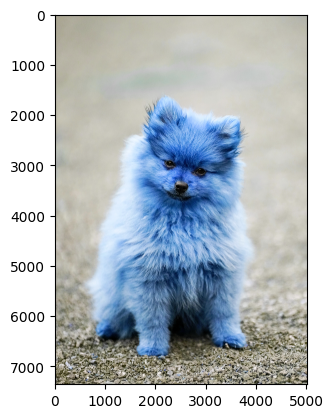

In [ ]:
test_img = cv2.imread('/content/dog3.jpg')
plt.imshow(test_img)

In [ ]:
cv2_imshow(test_img)
cv2.waitKey()
cv2.destroyAllWindows()

In [ ]:
test_img.shape

(7358, 5014, 3)

In [ ]:
test_img = cv2.resize(test_img, (256,256))
test_img.shape

(256, 256, 3)

In [ ]:
test_input= test_img.reshape(1,256,256,3)

In [ ]:
model.predict(test_input)

1/1 [==============================] - 0s 31ms/step


array([[0.]], dtype=float32)

# Transfer Learning Approach

In [ ]:
from keras.applications.vgg16 import VGG16

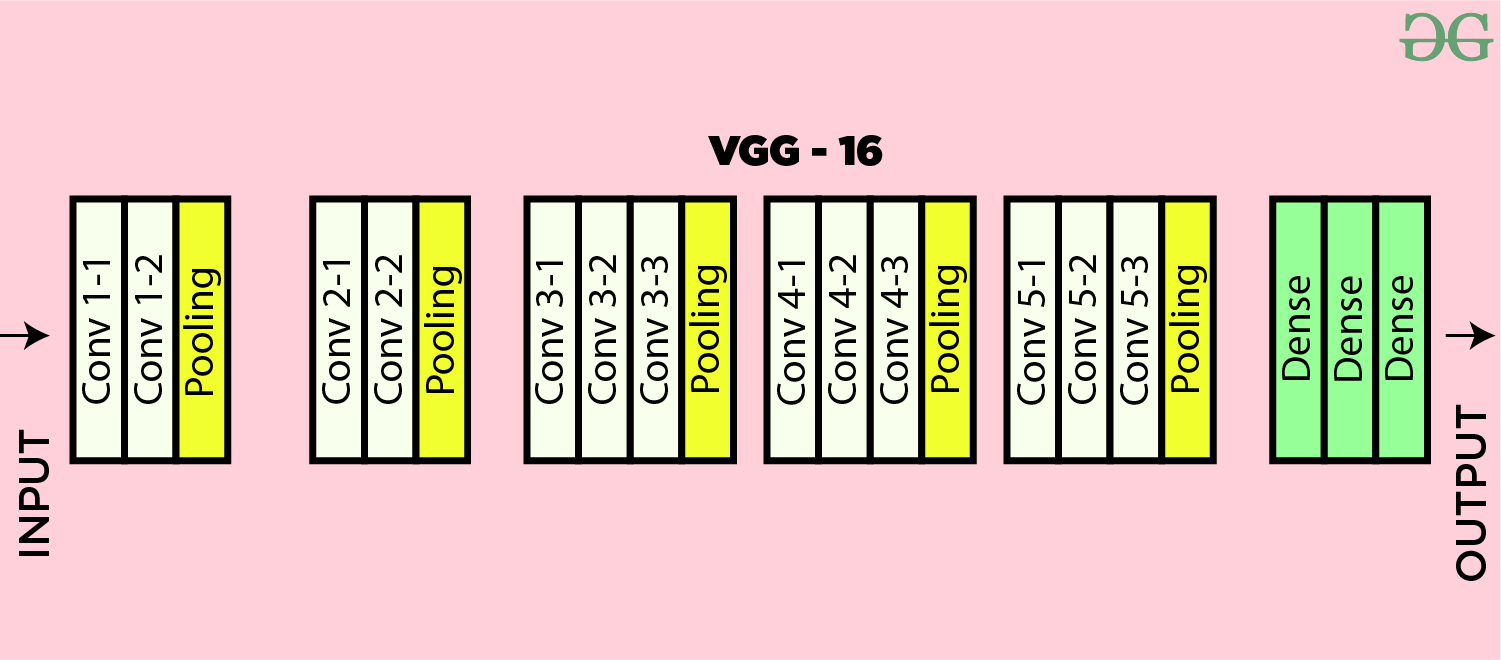

In [ ]:
cnn_base_model= VGG16(
    include_top=False,
    weights="imagenet",
    input_shape=(256,256,3))
cnn_base_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

In [ ]:
model_1 = Sequential()
model_1.add(cnn_base_model)

model_1.add(Flatten())

model_1.add(Dense(256, activation= "relu"))
model_1.add(BatchNormalization())
model_1.add(Dropout(0.25))

model_1.add(Dense(256, activation= "relu"))
model_1.add(BatchNormalization())
model_1.add(Dropout(0.25))

model_1.add(Dense(256, activation= "relu"))
model_1.add(BatchNormalization())
model_1.add(Dropout(0.25))

model_1.add(Dense(1, activation='sigmoid'))

model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 8, 8, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 32768)             0         
                                                                 
 dense (Dense)               (None, 256)               8388864   
                                                                 
 batch_normalization (BatchN  (None, 256)              1024      
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                        

In [ ]:
model_1.compile(optimizer= 'adam', loss= 'binary_crossentropy', metrics= ['accuracy'])
history_1 = model_1.fit(train_ds, batch_size=128, epochs=10, validation_data= test_ds)

Epoch 1/10
625/625 [==============================] - 356s 529ms/step - loss: 0.7038 - accuracy: 0.5998 - val_loss: 3.5551 - val_accuracy: 0.5152
Epoch 2/10
625/625 [==============================] - 329s 525ms/step - loss: 0.5921 - accuracy: 0.6819 - val_loss: 0.6806 - val_accuracy: 0.5668
Epoch 3/10
625/625 [==============================] - 327s 523ms/step - loss: 0.5492 - accuracy: 0.7194 - val_loss: 0.5122 - val_accuracy: 0.7488
Epoch 4/10
625/625 [==============================] - 344s 551ms/step - loss: 0.4559 - accuracy: 0.7804 - val_loss: 0.4115 - val_accuracy: 0.8270
Epoch 5/10
625/625 [==============================] - 327s 522ms/step - loss: 0.3798 - accuracy: 0.8289 - val_loss: 0.3536 - val_accuracy: 0.8396
Epoch 6/10
625/625 [==============================] - 326s 521ms/step - loss: 0.3249 - accuracy: 0.8583 - val_loss: 0.3607 - val_accuracy: 0.8368
Epoch 7/10
625/625 [==============================] - 325s 520ms/step - loss: 0.2925 - accuracy: 0.8760 - val_loss: 0.3732 -

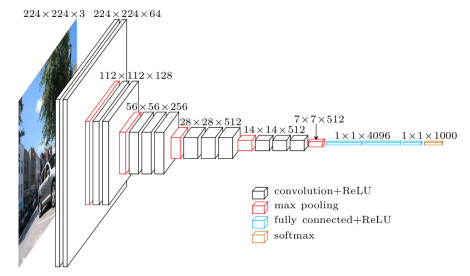

In [ ]:
model2 = Sequential()

